# DLProfile Example using Cosmic Tagger Application

## Set imports and neccessary environment variables

In [71]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [72]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.parent.parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [73]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [74]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [75]:
from src.vanidl import VaniDL
profile = VaniDL()

In [76]:
#!rm -f /tmp/temp_analysis/cosmic_run3_p8*

In [97]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/benchmark/cosmic/cosmic_run6_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 107623 of 107623 Parsing DXT File 
[============================================================] 100.0% 2953 of 2953 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [98]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/dlio_datasets/cosmic/img_1_of_1.h5']


In [99]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/dlio_datasets/cosmic/img_1_of_1.h5']


### Collect the summary of the Application

In [100]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	7.00 seconds
Time spent in I/O		:	3.67 seconds
% Time spent in I/O		:	52.40%
Total Data Accessed		:	2.91 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	1
# of MPI Ranks			:	64 ranks
Data Transfer size:
	Min,Max			:	8 bytes and 32768 bytes
	Average			:	31621 bytes
	Median			:	32768 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	468 B/s and 313 MB/s
	Average			:	97 MB/s
	Median			:	31 MB/s
Access Pattern:
	Sequential		:	79.10%
	Consecutive		:	39.85%


Files Summary:
File Types			:	['h5']
Dataset Size:
	Total			:	2.937 GB
	Min,Max			:	2.937 GB and 2.937 GB
	Average			:	2.937 GB


In [101]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 7.0 seconds'


In [102]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 3.6678390625038833 seconds'


### I/O time spent on each file

In [103]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/dhari/dlio_datasets/cosmic/img_1_of_1.h5: 3.67 seconds


### I/O Time spent per rank

In [104]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 1.31 seconds
I/O time for rank 1: 2.88 seconds
I/O time for rank 2: 3.67 seconds
I/O time for rank 3: 3.65 seconds
I/O time for rank 4: 3.71 seconds
I/O time for rank 5: 3.58 seconds
I/O time for rank 6: 3.52 seconds
I/O time for rank 7: 3.90 seconds
I/O time for rank 8: 3.87 seconds
I/O time for rank 9: 3.97 seconds
I/O time for rank 10: 3.34 seconds
I/O time for rank 11: 3.86 seconds
I/O time for rank 12: 3.78 seconds
I/O time for rank 13: 4.04 seconds
I/O time for rank 14: 3.85 seconds
I/O time for rank 15: 3.74 seconds
I/O time for rank 16: 3.77 seconds
I/O time for rank 17: 3.90 seconds
I/O time for rank 18: 3.65 seconds
I/O time for rank 19: 3.73 seconds
I/O time for rank 20: 4.15 seconds
I/O time for rank 21: 3.92 seconds
I/O time for rank 22: 3.83 seconds
I/O time for rank 23: 3.84 seconds
I/O time for rank 24: 3.61 seconds
I/O time for rank 25: 3.68 seconds
I/O time for rank 26: 3.61 seconds
I/O time for rank 27: 3.75 seconds
I/O time for rank 28: 3.63 sec

In [105]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize()))

'Total I/O performed by application: 3129376000.00 GB'

### I/O performed on each file

In [106]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmic/img_1_of_1.h5: 2984.41 MB


In [107]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 46.63 MB
I/O performed by rank 1: 46.63 MB
I/O performed by rank 2: 46.63 MB
I/O performed by rank 3: 46.63 MB
I/O performed by rank 4: 46.63 MB
I/O performed by rank 5: 46.63 MB
I/O performed by rank 6: 46.63 MB
I/O performed by rank 7: 46.63 MB
I/O performed by rank 8: 46.63 MB
I/O performed by rank 9: 46.63 MB
I/O performed by rank 10: 46.63 MB
I/O performed by rank 11: 46.63 MB
I/O performed by rank 12: 46.63 MB
I/O performed by rank 13: 46.63 MB
I/O performed by rank 14: 46.63 MB
I/O performed by rank 15: 46.63 MB
I/O performed by rank 16: 46.63 MB
I/O performed by rank 17: 46.63 MB
I/O performed by rank 18: 46.63 MB
I/O performed by rank 19: 46.63 MB
I/O performed by rank 20: 46.63 MB
I/O performed by rank 21: 46.63 MB
I/O performed by rank 22: 46.63 MB
I/O performed by rank 23: 46.63 MB
I/O performed by rank 24: 46.63 MB
I/O performed by rank 25: 46.63 MB
I/O performed by rank 26: 46.63 MB
I/O performed by rank 27: 46.63 MB
I/O performed by rank 28: 46.6

In [108]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'img_1_of_1': 3153763376.0}


### How application access data over time.

[============================================================] 100.0% 98964 of 98964 Creating Timeline 


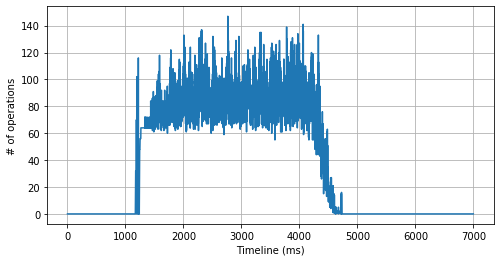

In [109]:
tl = profile.CreateIOTimeline(time_step=0.001)
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("# of operations")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['operation_count']);

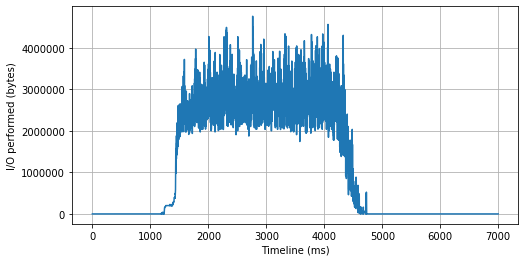

In [110]:
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("I/O performed (bytes)")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 98964 of 98964 Creating Timeline 


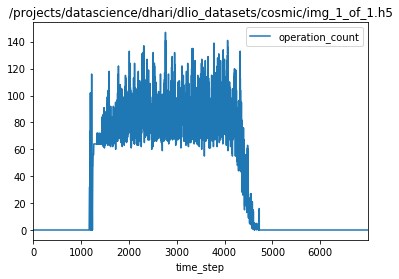

In [111]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


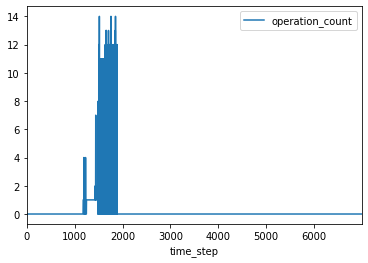

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


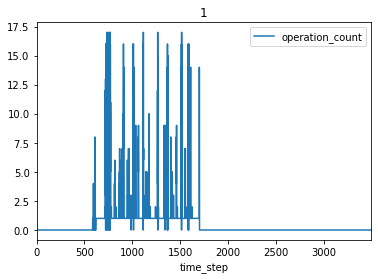

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


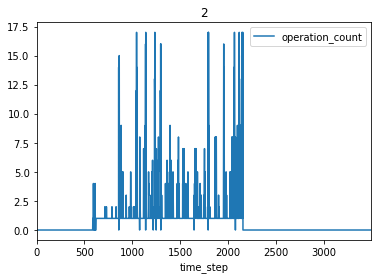

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


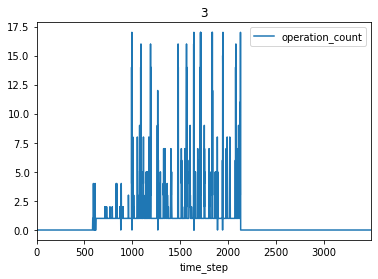

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


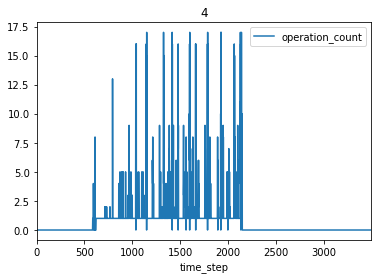

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


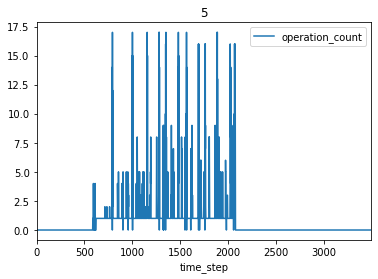

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


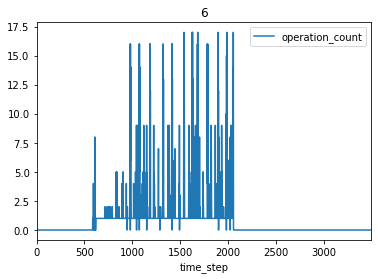

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


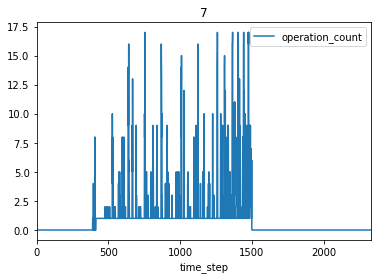

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


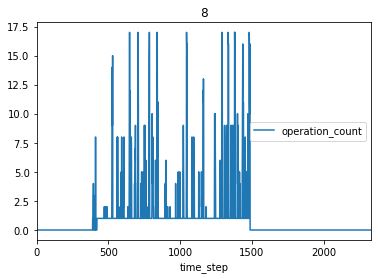

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


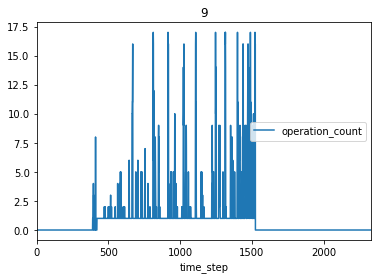

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


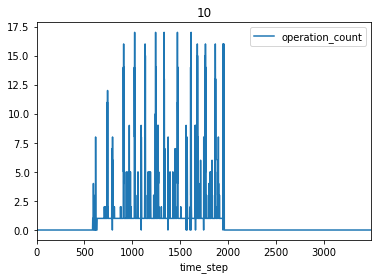

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


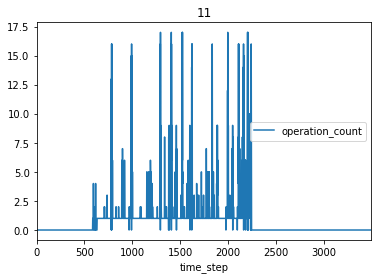

[============================================================] 100.0% 1545 of 1545 Creating Timeline 


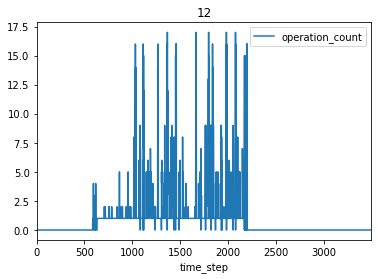

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


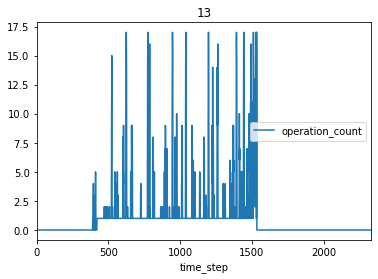

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


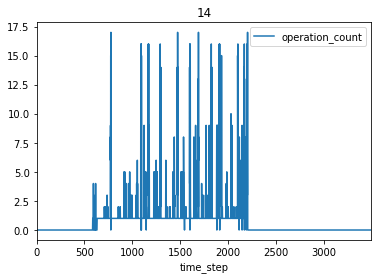

[============================================================] 100.0% 1545 of 1545 Creating Timeline 


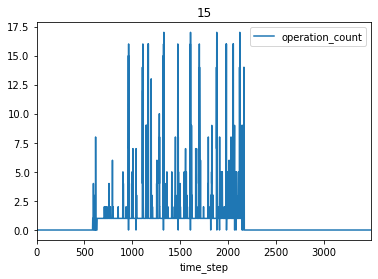

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


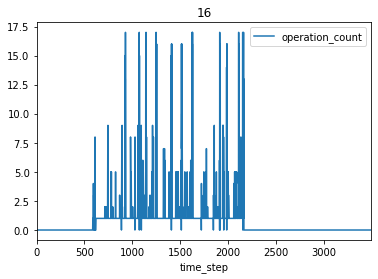

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


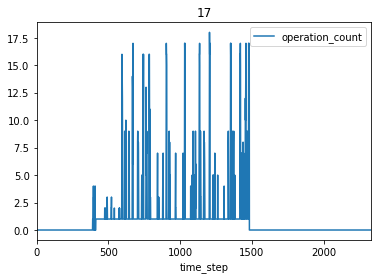

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


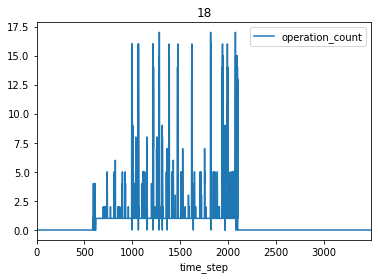

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


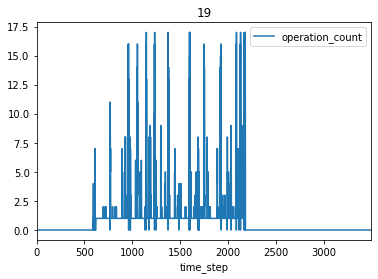

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


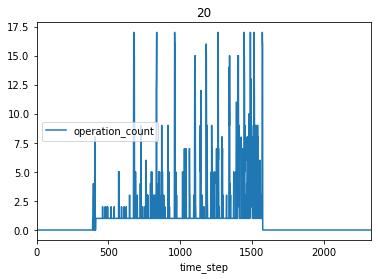

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


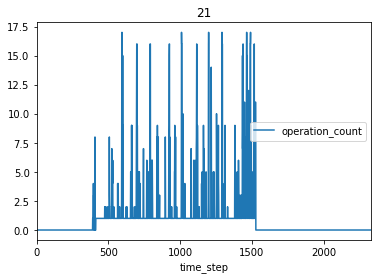

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


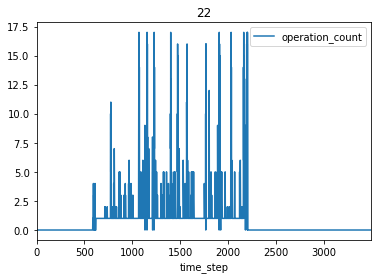

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


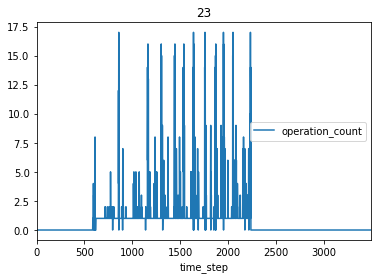

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


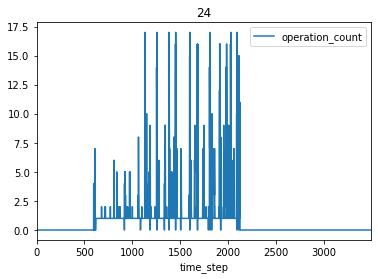

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


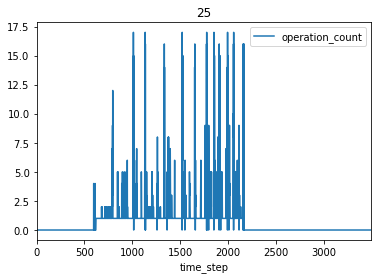

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


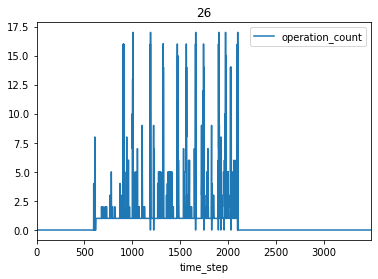

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


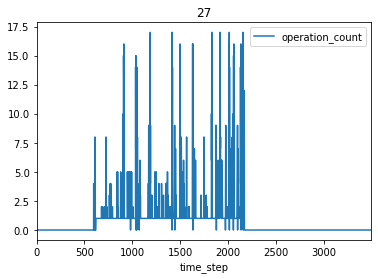

[============================================================] 100.0% 1545 of 1545 Creating Timeline 


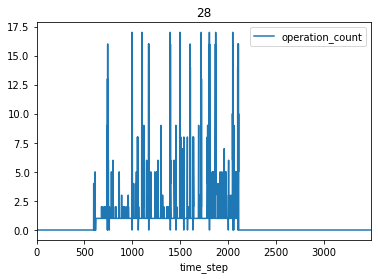

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


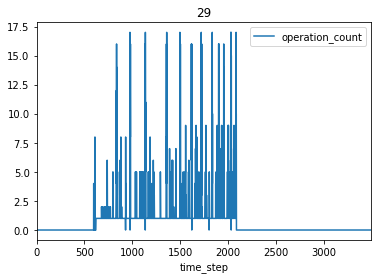

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


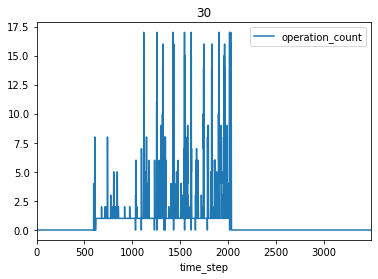

[============================================================] 100.0% 1545 of 1545 Creating Timeline 


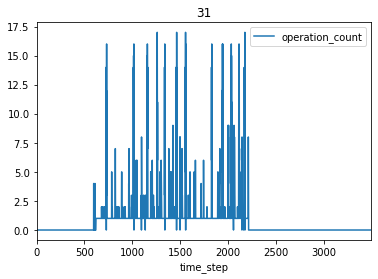

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


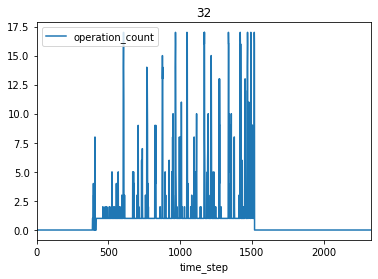

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


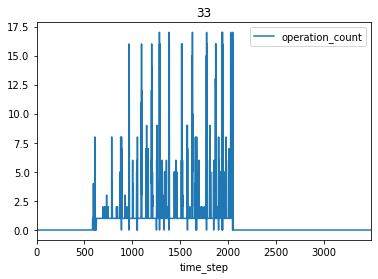

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


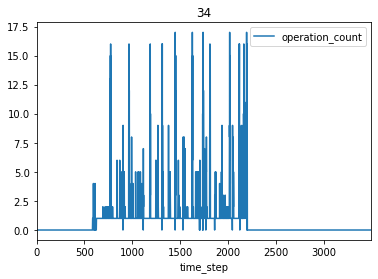

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


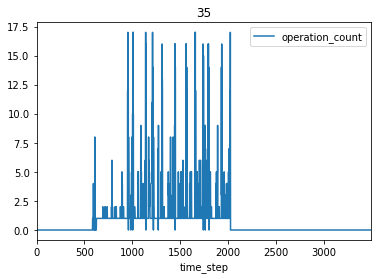

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


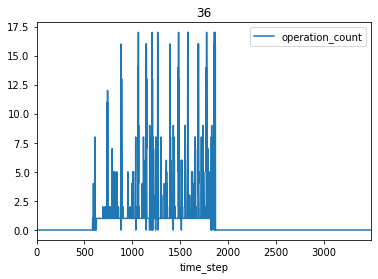

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


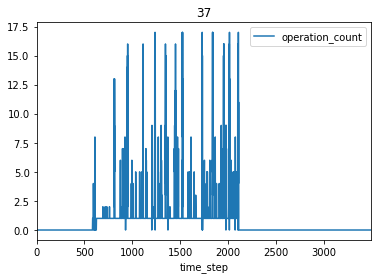

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


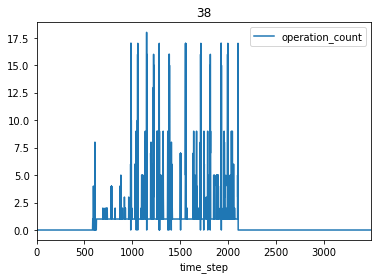

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


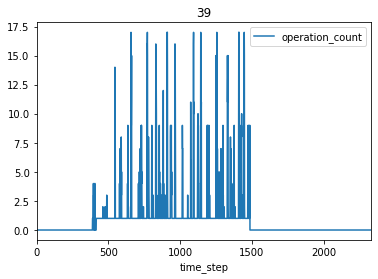

[============================================================] 100.0% 1545 of 1545 Creating Timeline 


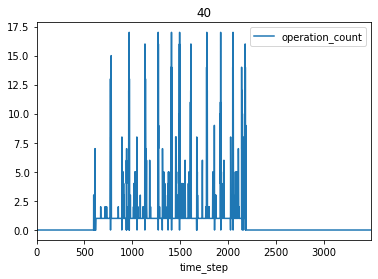

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


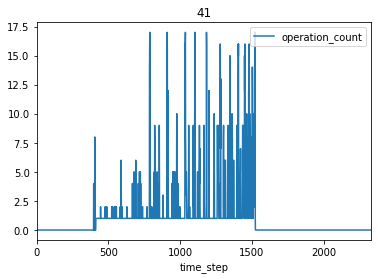

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


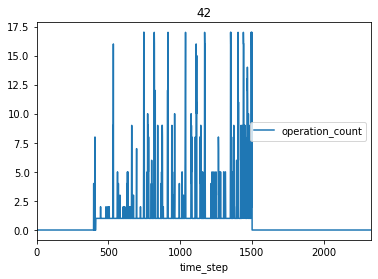

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


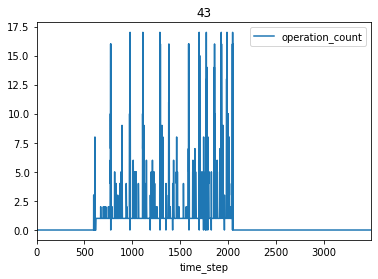

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


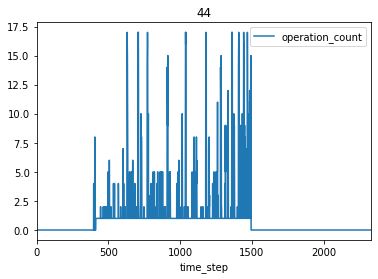

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


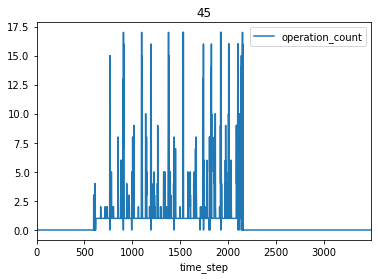

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


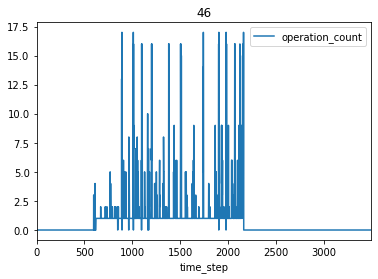

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


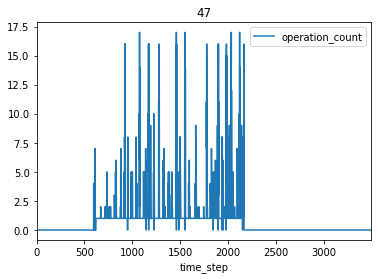

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


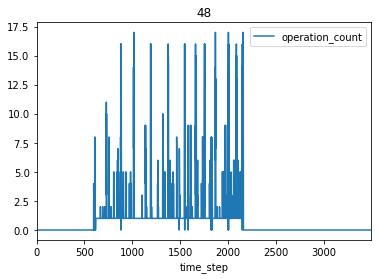

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


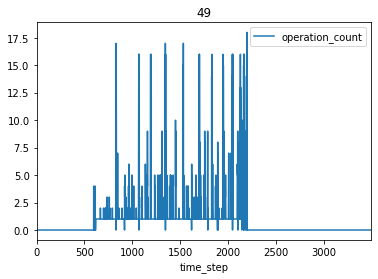

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


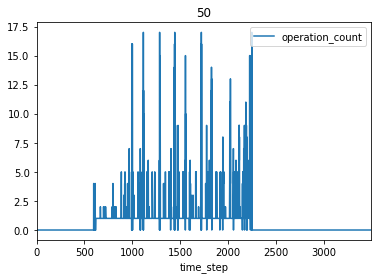

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


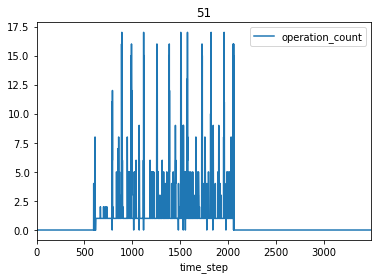

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


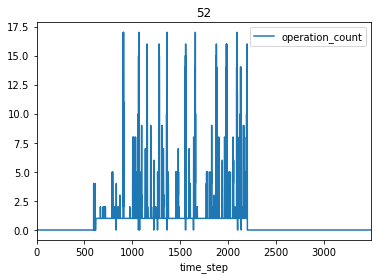

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


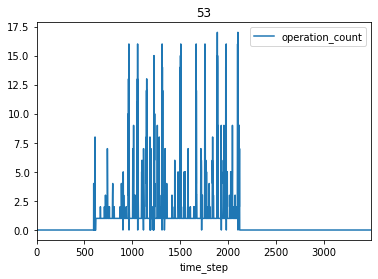

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


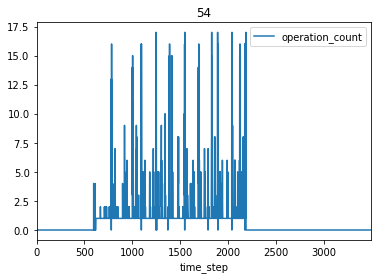

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


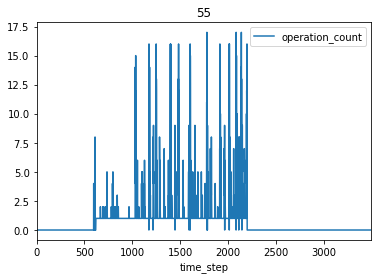

[============================================================] 100.0% 1545 of 1545 Creating Timeline 


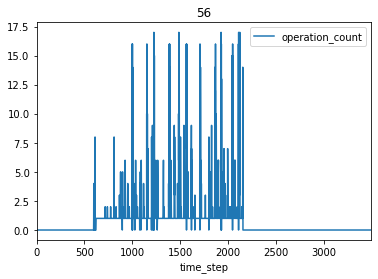

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


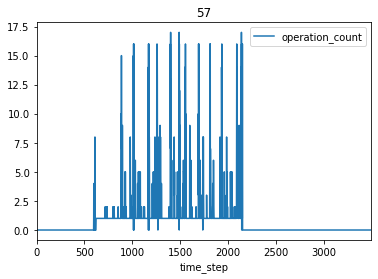

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


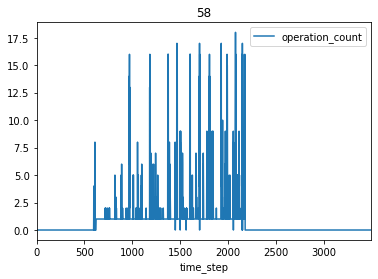

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


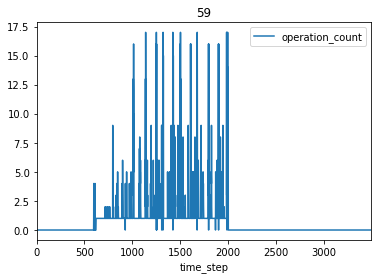

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


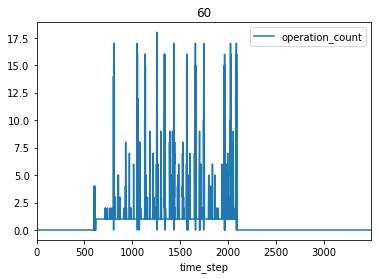

[============================================================] 100.0% 1547 of 1547 Creating Timeline 


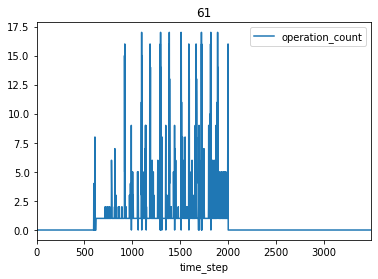

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


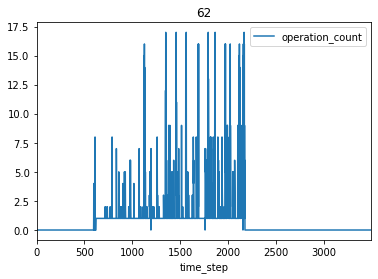

[============================================================] 100.0% 1546 of 1546 Creating Timeline 


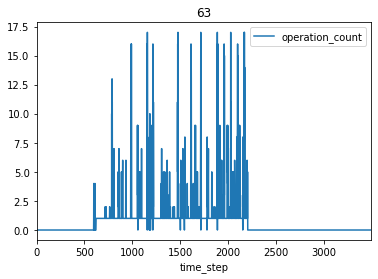

In [112]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

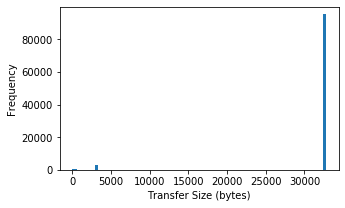

In [113]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3), bins=100);
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

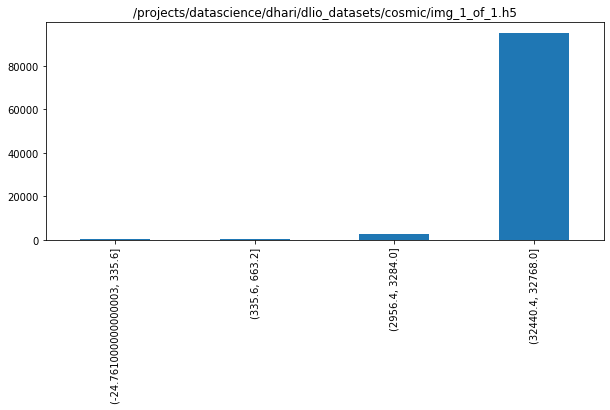

In [114]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

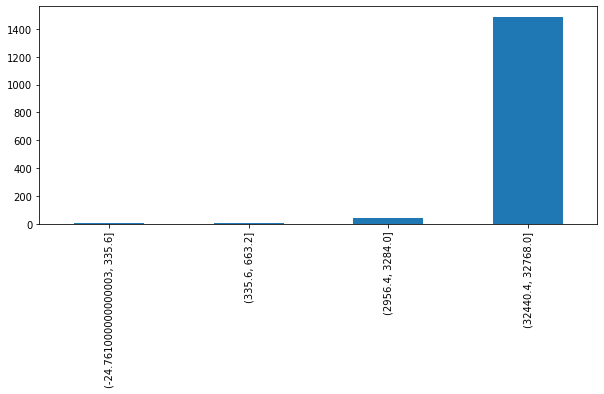

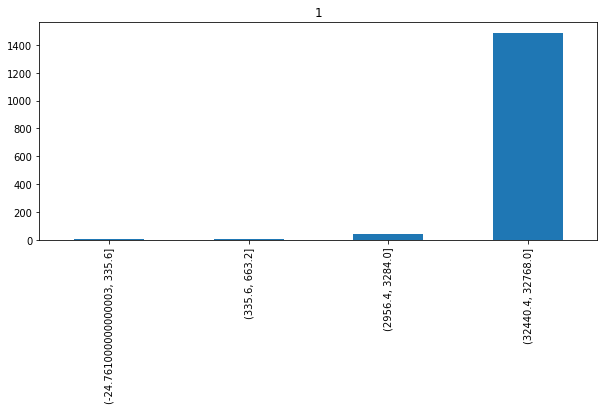

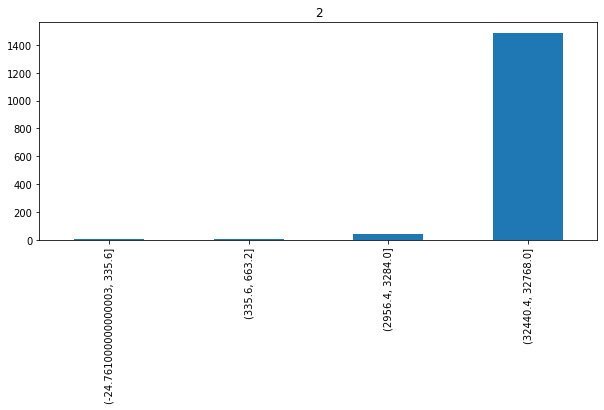

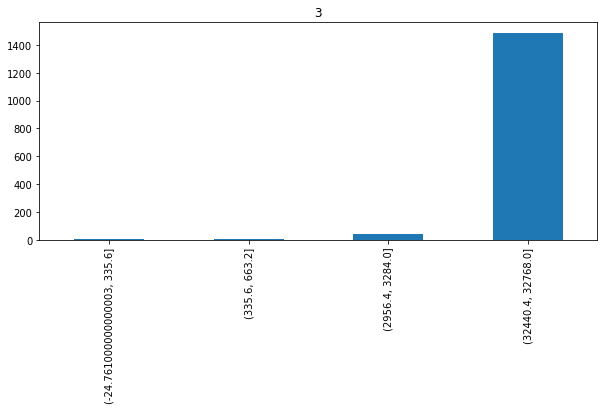

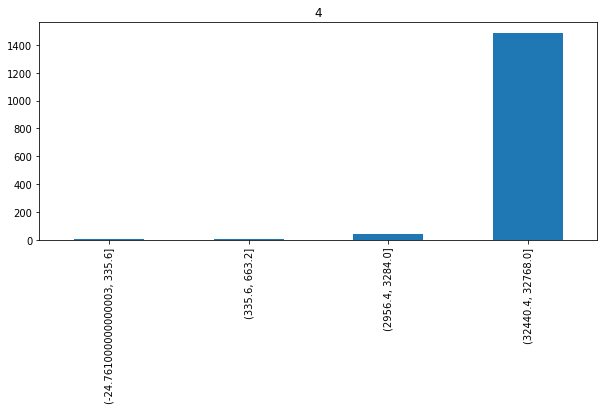

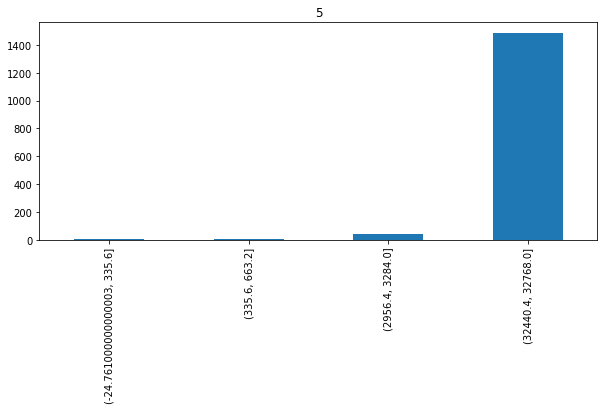

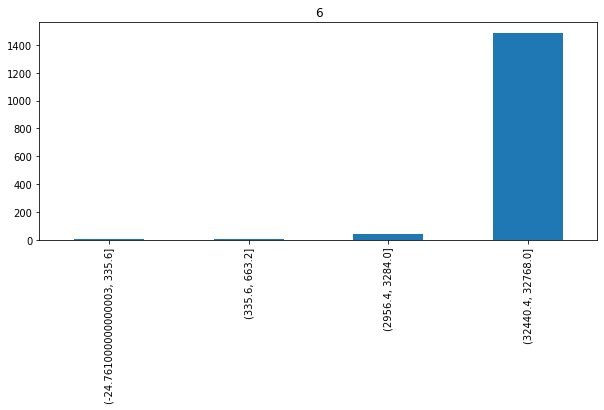

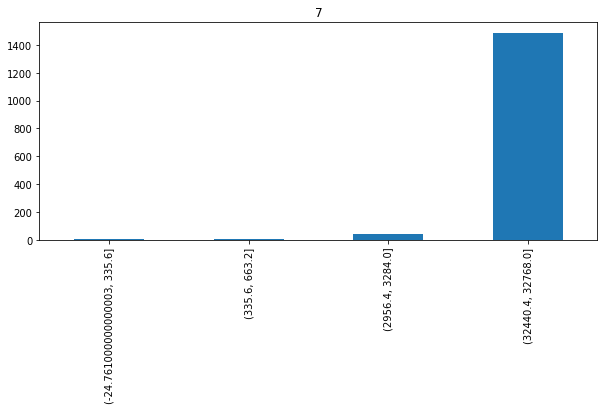

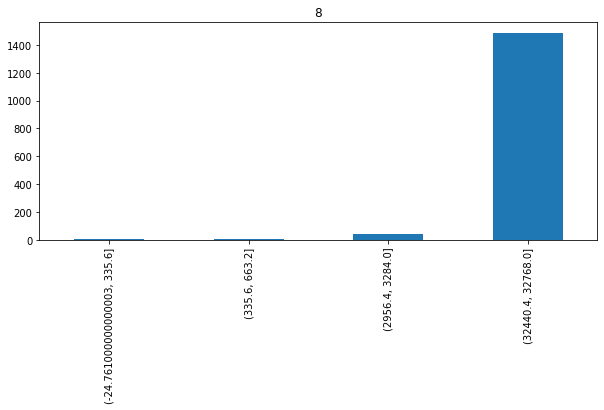

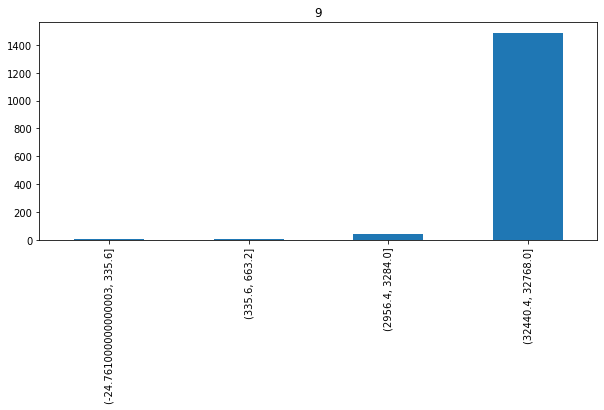

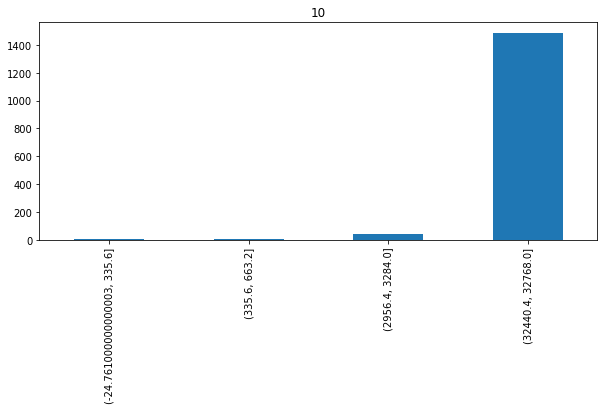

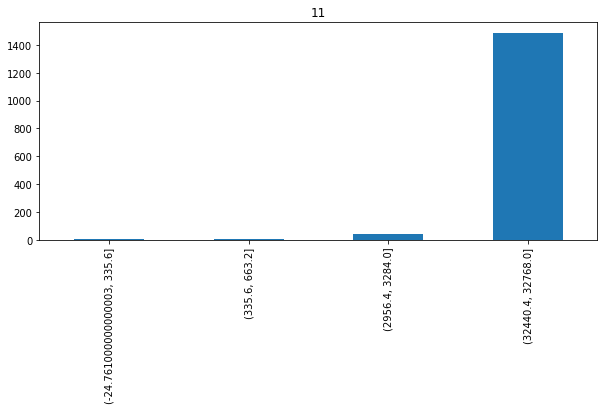

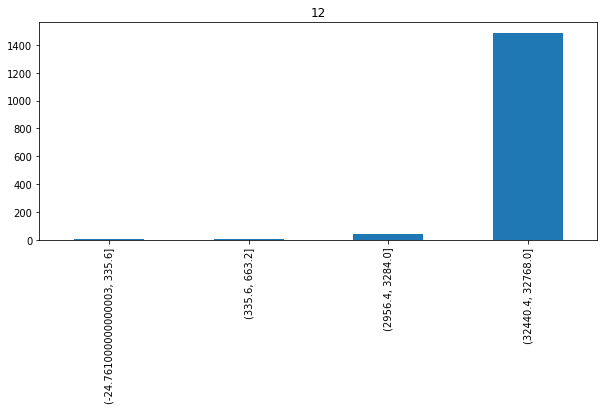

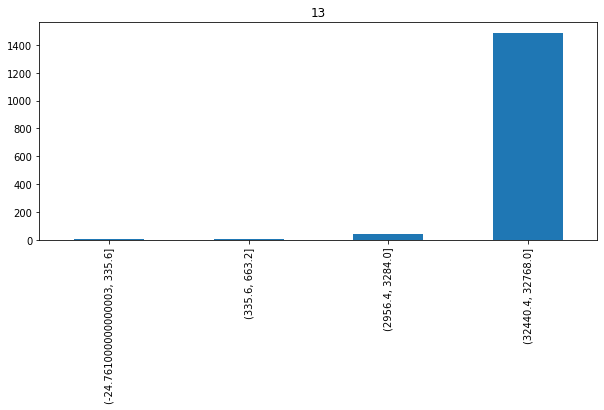

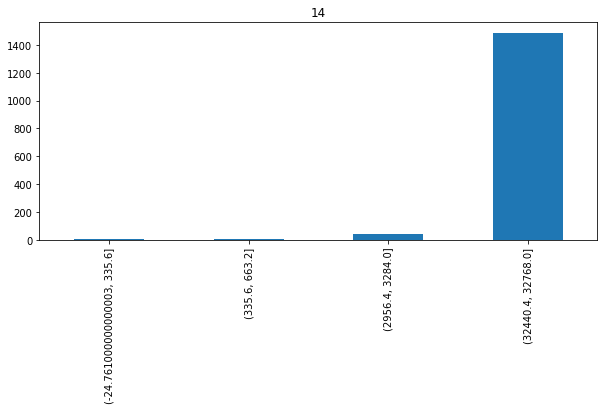

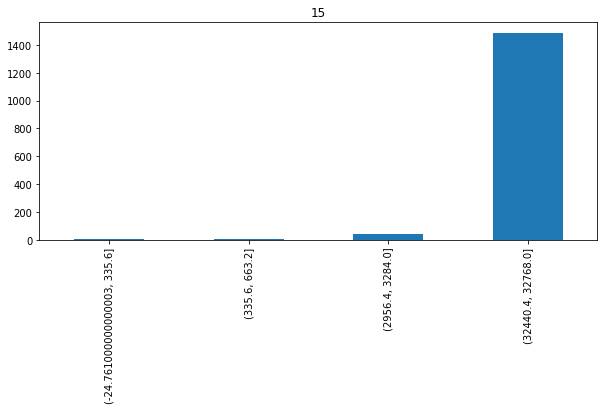

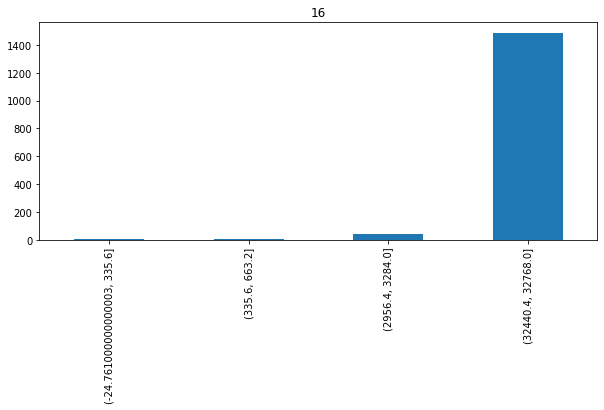

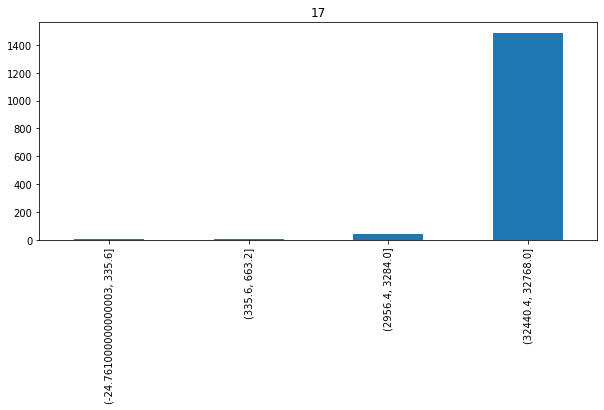

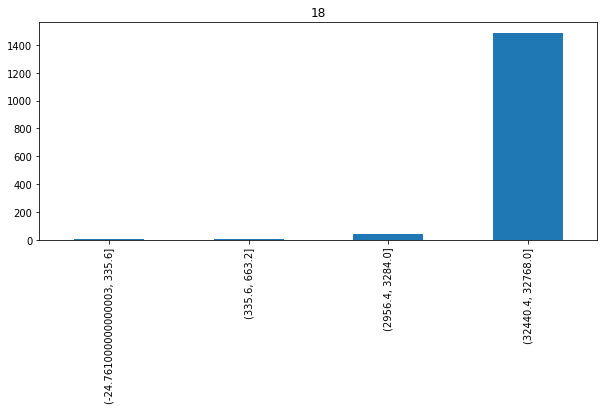

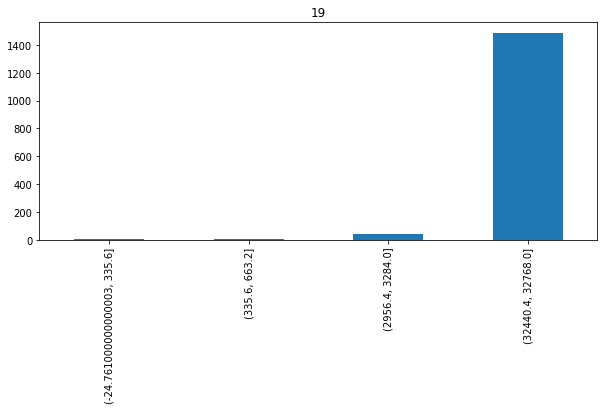

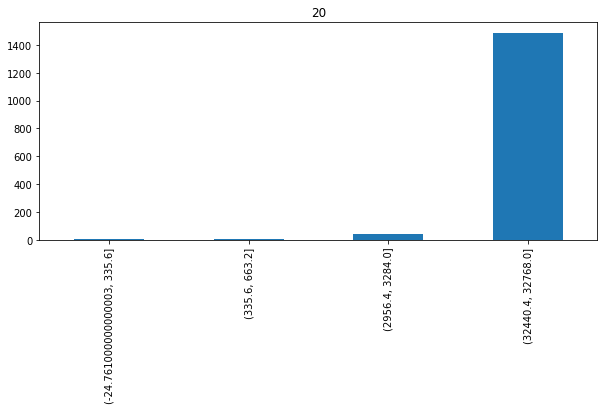

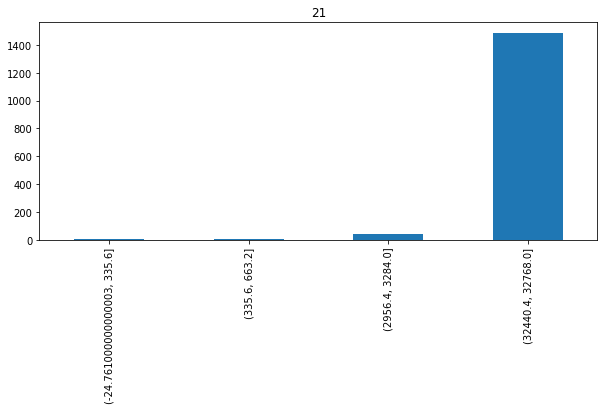

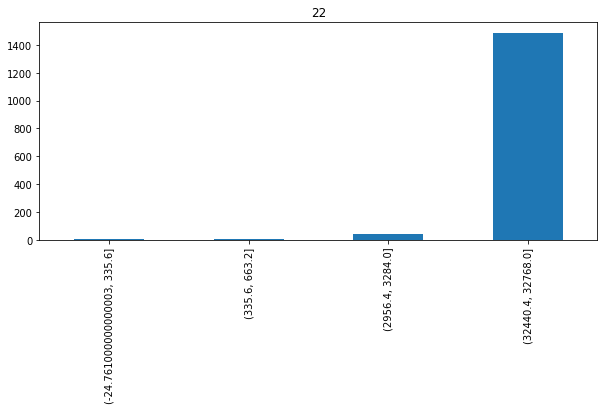

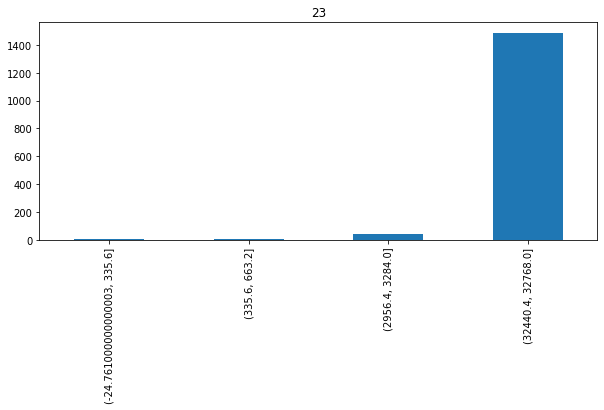

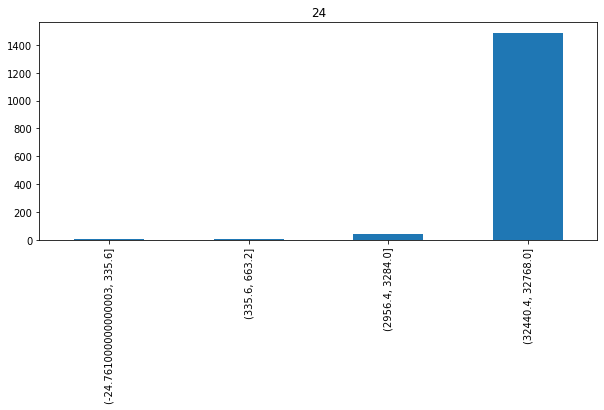

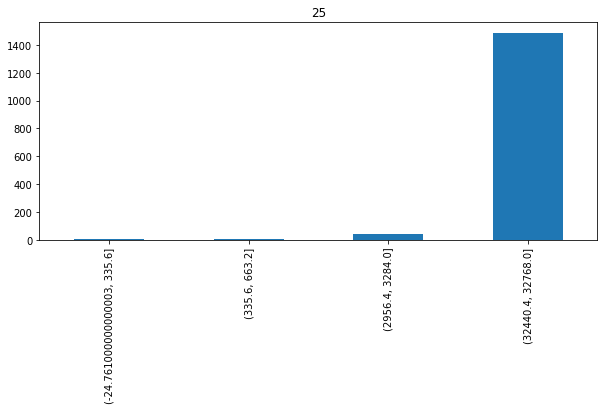

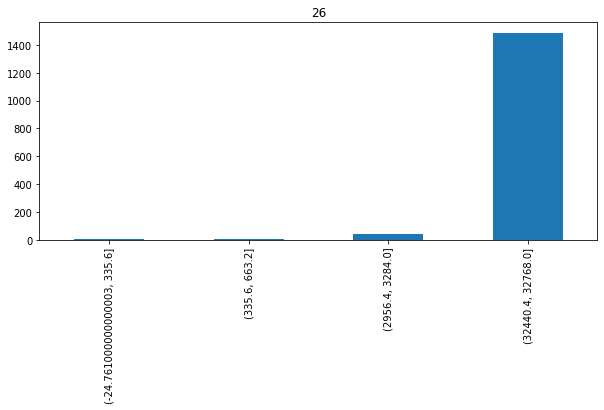

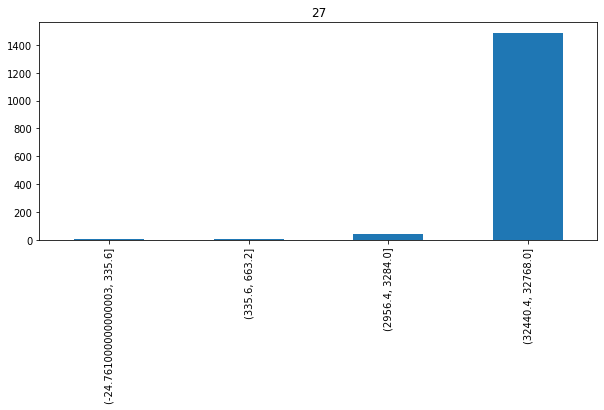

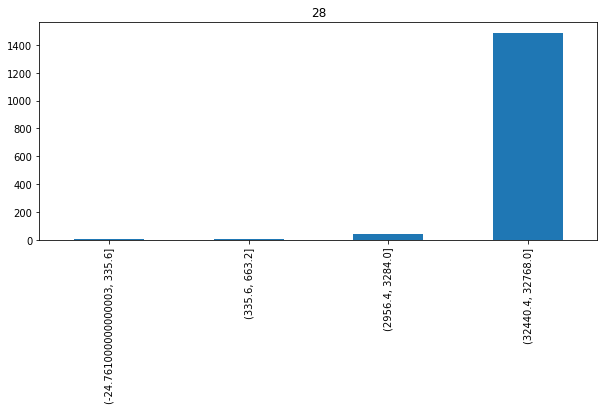

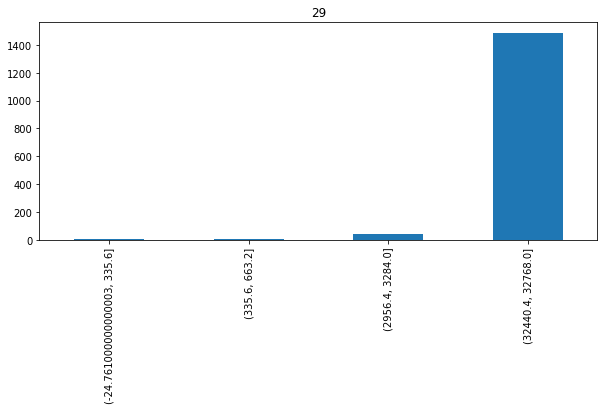

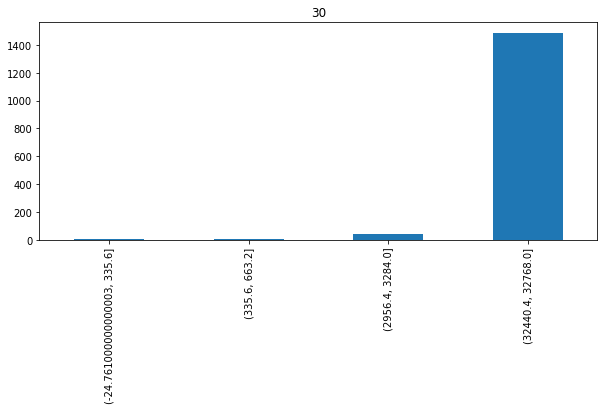

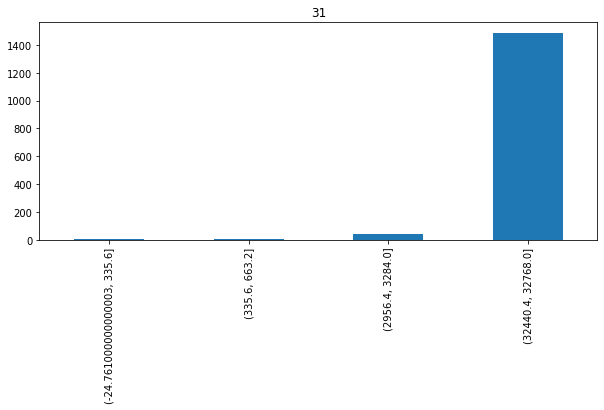

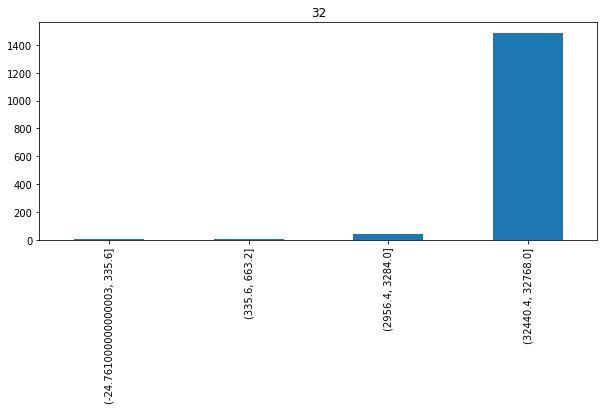

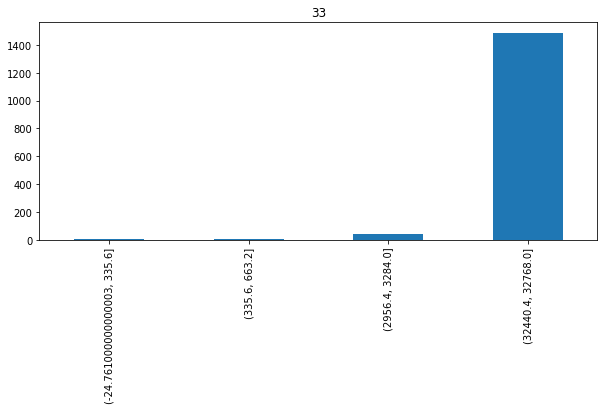

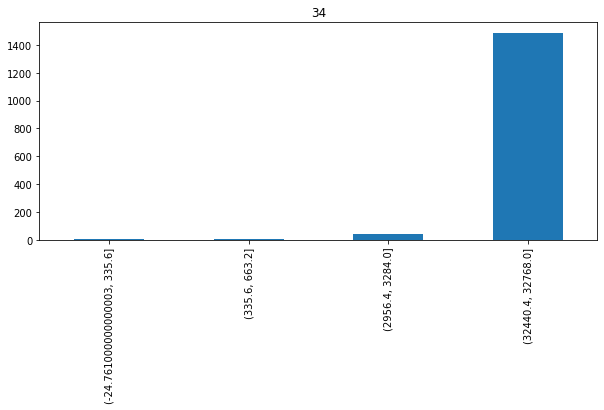

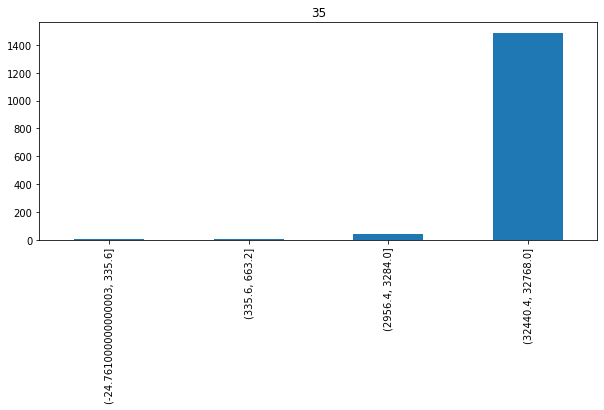

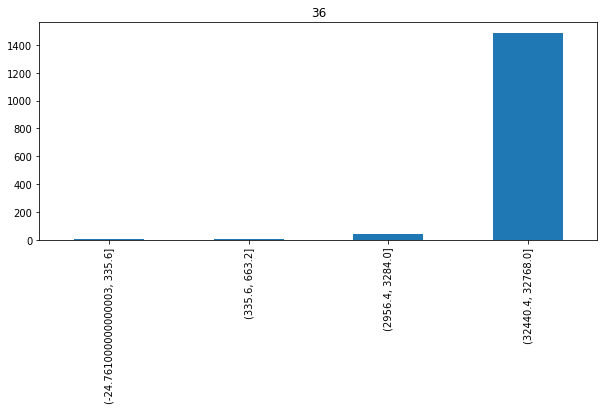

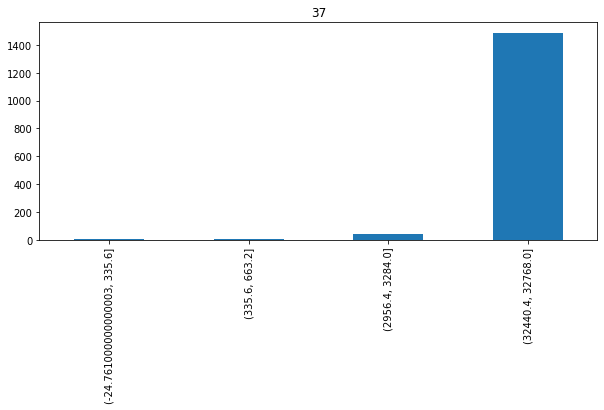

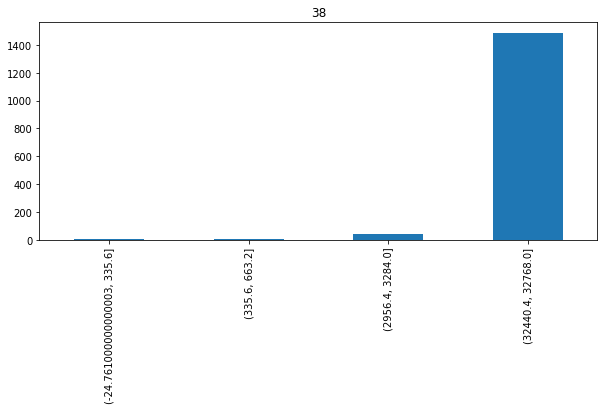

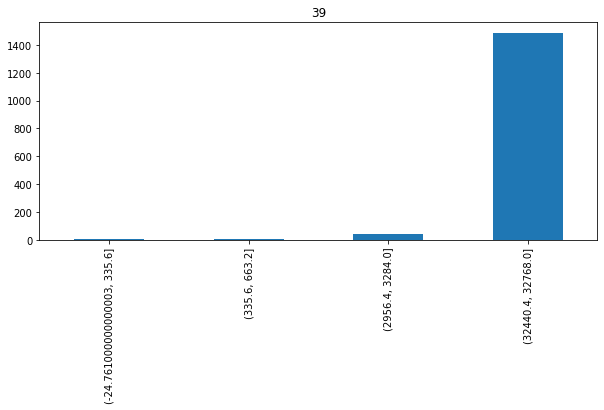

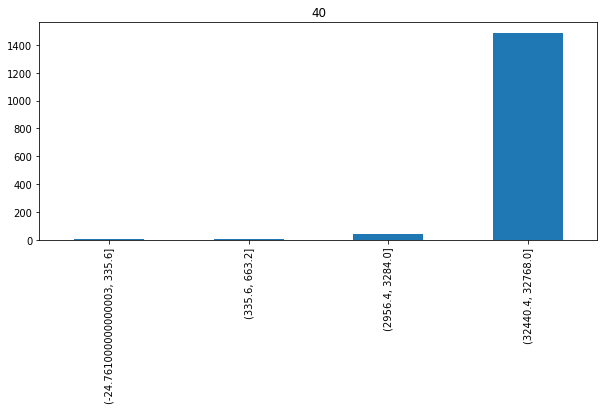

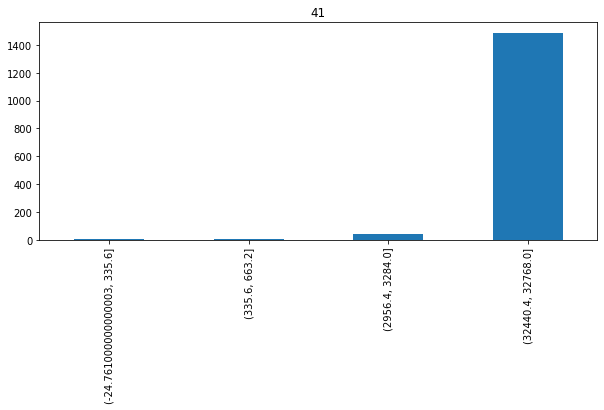

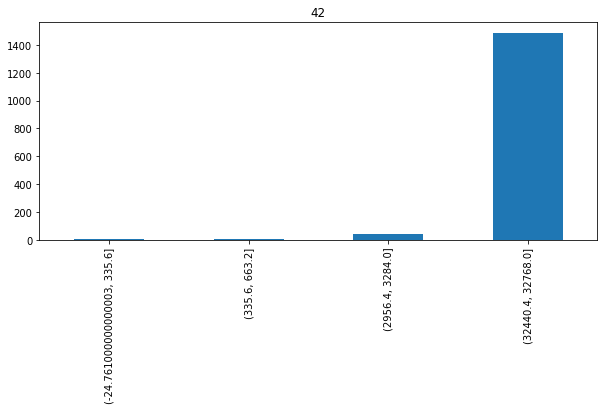

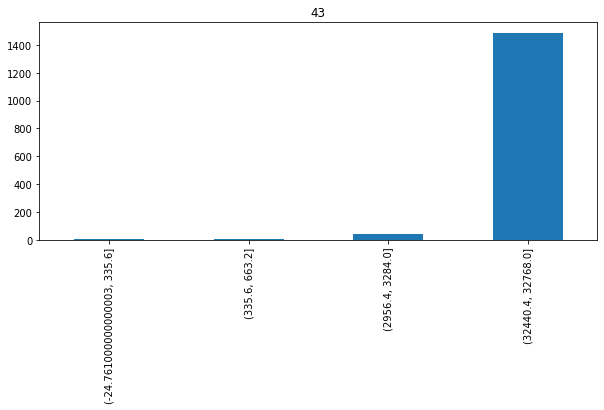

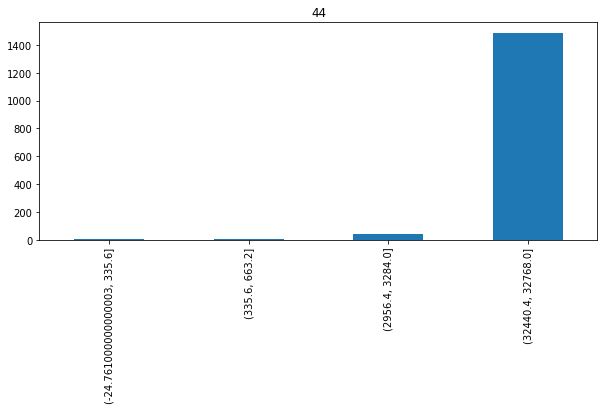

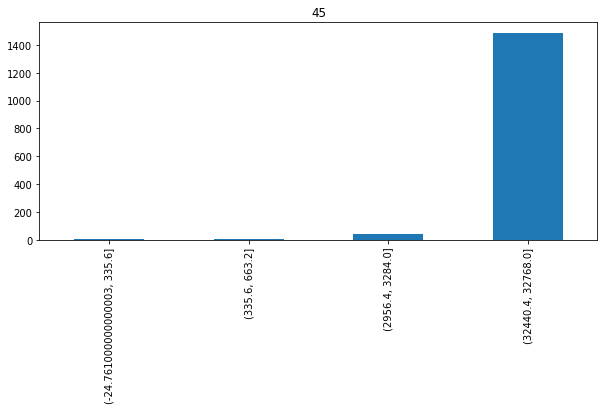

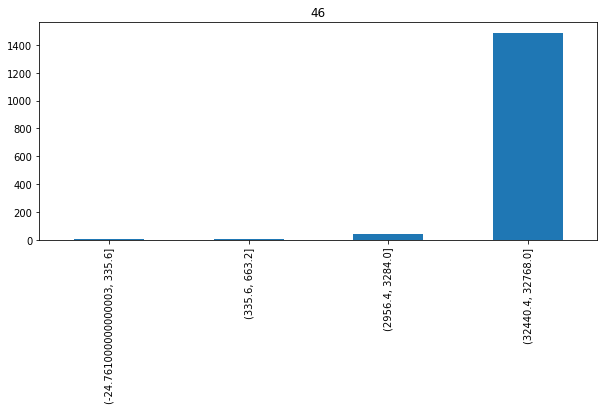

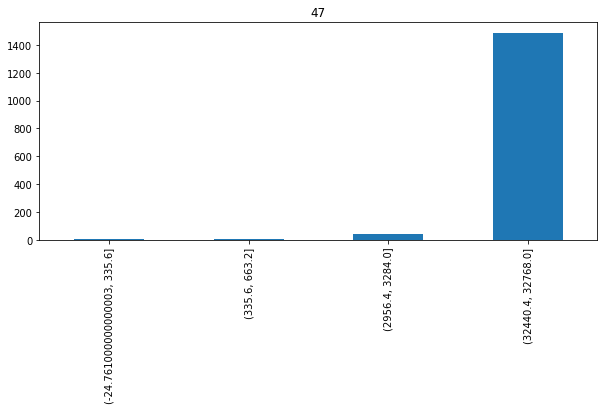

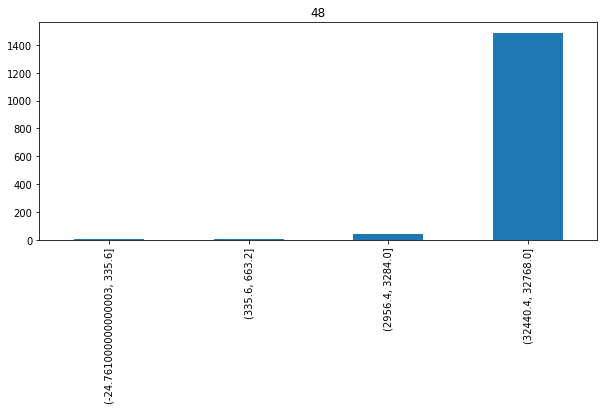

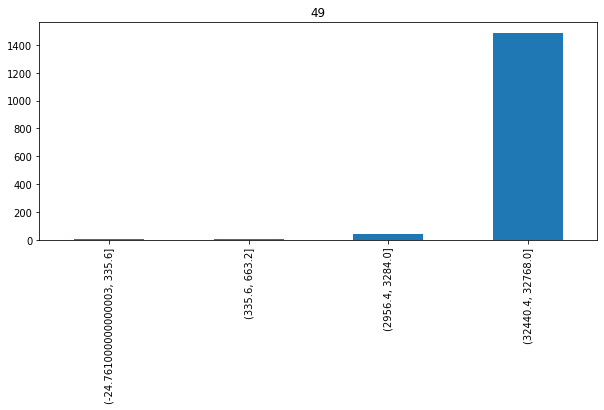

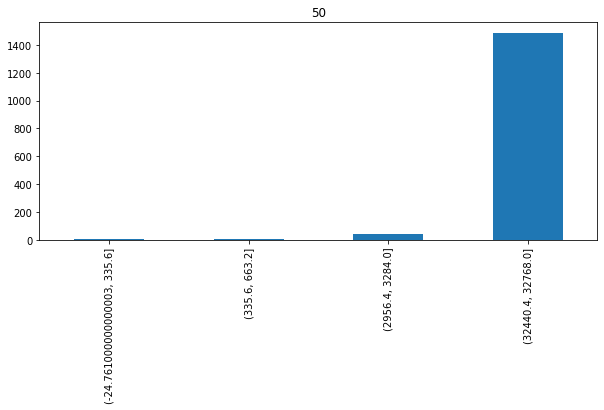

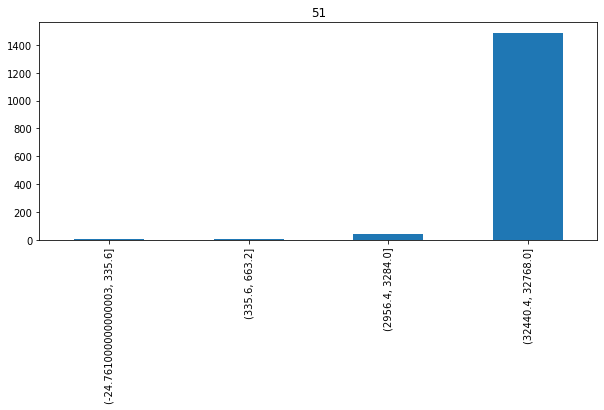

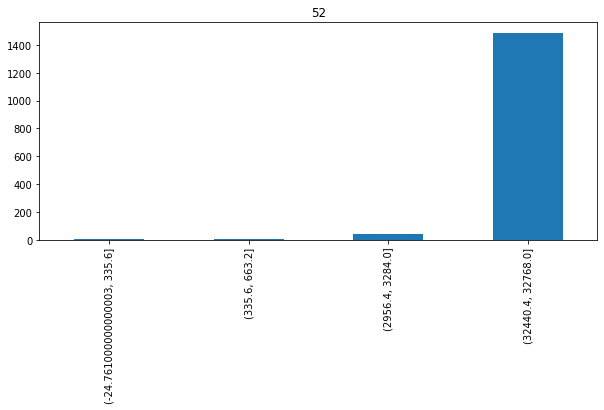

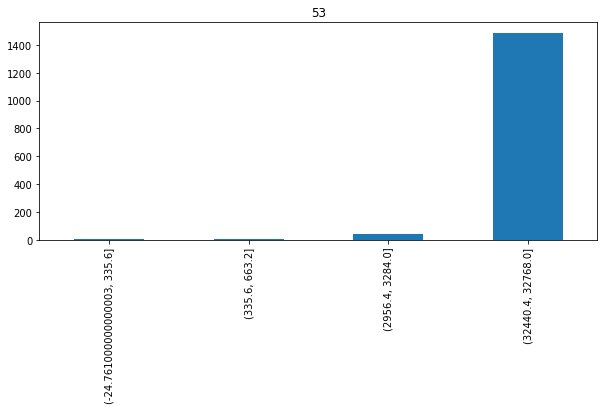

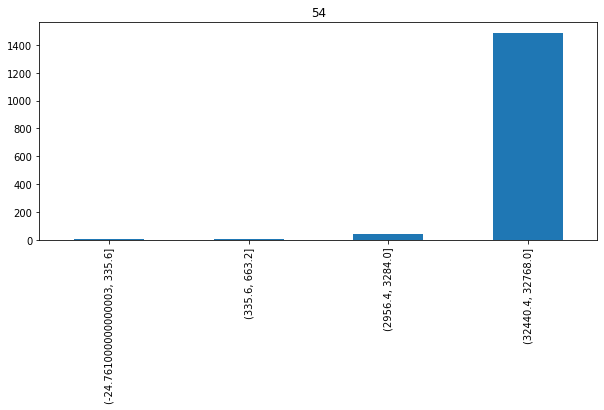

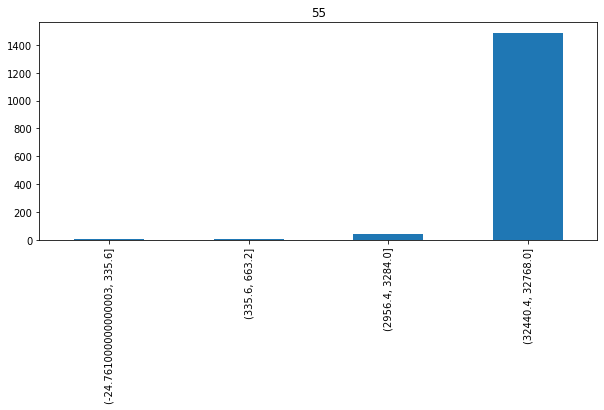

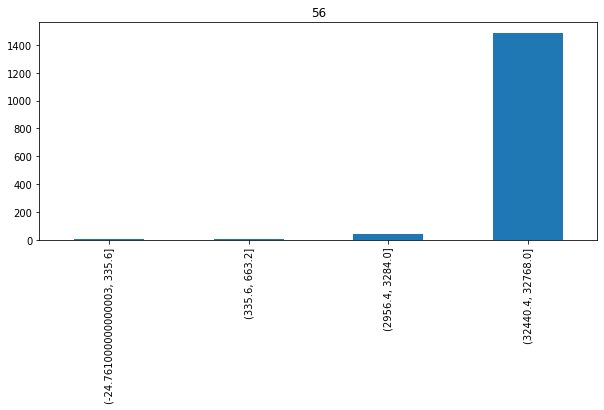

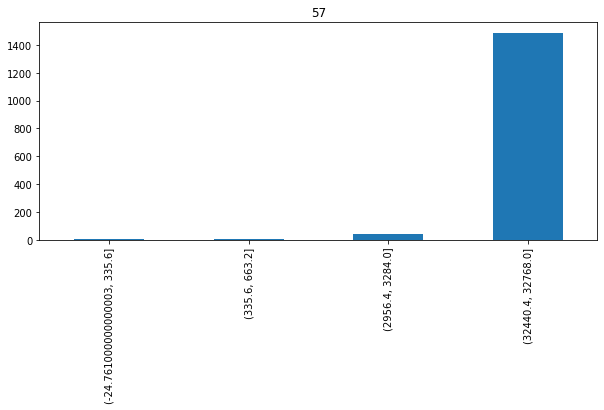

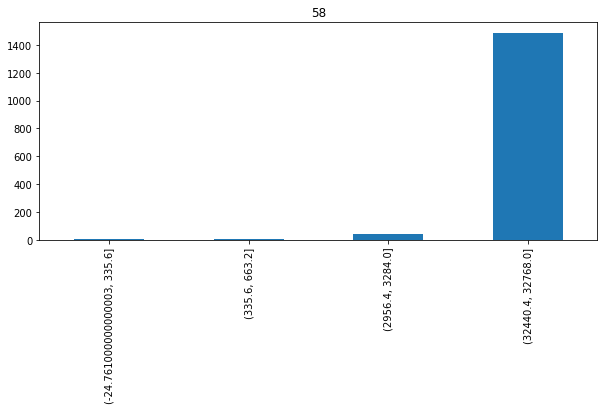

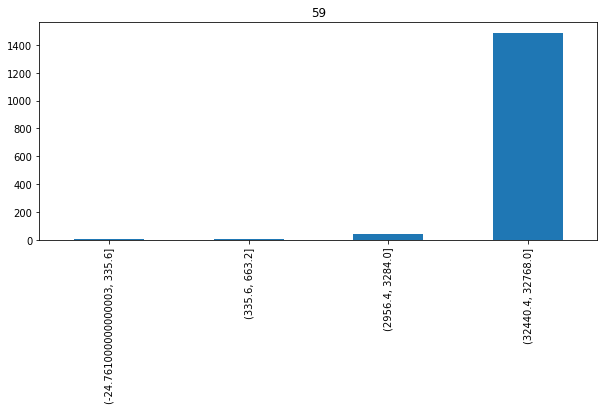

In [ ]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [ ]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))